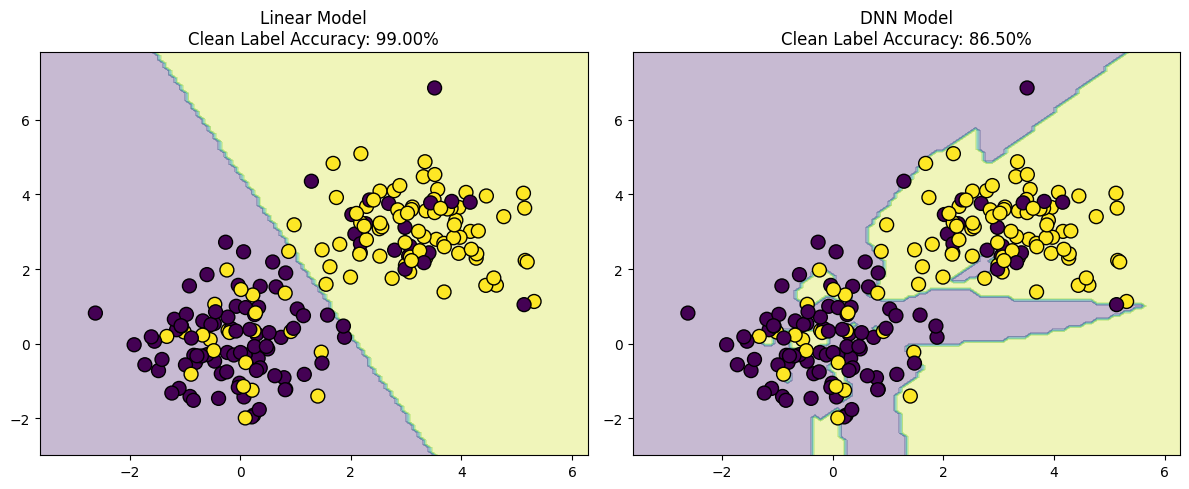

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.datasets import make_moons

# Seed for reproducibility
np.random.seed(42)

# Generate data
n_samples = 100
X_class0 = np.random.normal(loc=0, scale=1, size=(n_samples, 2))
X_class1 = np.random.normal(loc=3, scale=1, size=(n_samples, 2))

X = np.vstack((X_class0, X_class1))
y = np.hstack((np.zeros(n_samples), np.ones(n_samples)))

# Introduce label noise by flipping 20% of the labels
flip_fraction = 0.2
n_flip = int(flip_fraction * len(y))
flip_indices = np.random.choice(len(y), size=n_flip, replace=False)
y_noisy = y.copy()
y_noisy[flip_indices] = 1 - y_noisy[flip_indices]

# Train a linear model
linear_model = LogisticRegression()
linear_model.fit(X, y_noisy)
y_pred_linear = linear_model.predict(X)
linear_acc = accuracy_score(y, y_pred_linear)

# Train a deep neural network
dnn_model = MLPClassifier(hidden_layer_sizes=(100,100), max_iter=1500, random_state=42)
dnn_model.fit(X, y_noisy)
y_pred_dnn = dnn_model.predict(X)
dnn_acc = accuracy_score(y, y_pred_dnn)

# Function to plot decision boundary
def plot_decision_boundary(model, X, y, ax, title):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    ax.contourf(xx, yy, Z, alpha=0.3)
    ax.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', marker='o', s=100)
    ax.set_title(title)

# Plot the decision boundaries
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

plot_decision_boundary(linear_model, X, y_noisy, axes[0], f'Linear Model\nClean Label Accuracy: {linear_acc * 100:.2f}%')
plot_decision_boundary(dnn_model, X, y_noisy, axes[1], f'DNN Model\nClean Label Accuracy: {dnn_acc * 100:.2f}%')

plt.tight_layout()
plt.savefig('thesis_overfit.pdf') 
plt.show()

# Memorization

In [28]:

# Seed for reproducibility
np.random.seed(42)

# Generate data
n_samples = 100
X_class0 = np.random.normal(loc=0, scale=1, size=(n_samples, 2))
X_class1 = np.random.normal(loc=3, scale=1, size=(n_samples, 2))

X = np.vstack((X_class0, X_class1))
y = np.hstack((np.zeros(n_samples), np.ones(n_samples)))

# Introduce label noise by flipping 20% of the labels
flip_fraction = 0.4
n_flip = int(flip_fraction * len(y))
flip_indices = np.random.choice(len(y), size=n_flip, replace=False)
y_noisy = y.copy()
y_noisy[flip_indices] = 1 - y_noisy[flip_indices]


# Set the parameters for the experiment
max_iter = 20
num_runs = 20

# Initialize lists to store results from each run
all_correct_noisy = []
all_memorized_noisy = []

for run in range(num_runs):
    correct_noisy = []
    memorized_noisy = []

    # Different random seed for each run
    seed = run + 42
    np.random.seed(seed)

    for iter in range(1, max_iter + 1):
        dnn_model = MLPClassifier(hidden_layer_sizes=(100, 100), max_iter=iter, warm_start=False, random_state=seed)
        dnn_model.fit(X, y_noisy)

        # Predictions on the training set
        y_train_pred = dnn_model.predict(X)

        # Correct predictions on noisy labels
        correct_noisy_count = 100 * np.sum((y_train_pred == y) & (y_noisy != y)) / np.sum((y_noisy != y))

        # Memorization check: prediction equals noisy label but disagrees with clean label
        memorized_noisy_count = 100 * np.sum((y_train_pred == y_noisy) & (y_noisy != y)) / np.sum((y_noisy != y))

        # Append the fractions
        correct_noisy.append(correct_noisy_count)
        memorized_noisy.append(memorized_noisy_count)

    all_correct_noisy.append(correct_noisy)
    all_memorized_noisy.append(memorized_noisy)

# Compute mean and standard deviation
mean_correct_noisy = np.mean(all_correct_noisy, axis=0)
std_correct_noisy = np.std(all_correct_noisy, axis=0)
mean_memorized_noisy = np.mean(all_memorized_noisy, axis=0)
std_memorized_noisy = np.std(all_memorized_noisy, axis=0)



/h/snagaraj/.conda/envs/noisyTS/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(
/h/snagaraj/.conda/envs/noisyTS/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2) reached and the optimization hasn't converged yet.
  warnings.warn(
/h/snagaraj/.conda/envs/noisyTS/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (3) reached and the optimization hasn't converged yet.
  warnings.warn(
/h/snagaraj/.conda/envs/noisyTS/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (4) reached and the optimization hasn't converged yet.
  warnings.warn(
/h/snaga

/h/snagaraj/.conda/envs/noisyTS/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (15) reached and the optimization hasn't converged yet.
  warnings.warn(
/h/snagaraj/.conda/envs/noisyTS/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (16) reached and the optimization hasn't converged yet.
  warnings.warn(
/h/snagaraj/.conda/envs/noisyTS/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (17) reached and the optimization hasn't converged yet.
  warnings.warn(
/h/snagaraj/.conda/envs/noisyTS/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (18) reached and the optimization hasn't converged yet.
  warnings.warn(
/h/s

/h/snagaraj/.conda/envs/noisyTS/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (9) reached and the optimization hasn't converged yet.
  warnings.warn(
/h/snagaraj/.conda/envs/noisyTS/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(
/h/snagaraj/.conda/envs/noisyTS/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (11) reached and the optimization hasn't converged yet.
  warnings.warn(
/h/snagaraj/.conda/envs/noisyTS/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (12) reached and the optimization hasn't converged yet.
  warnings.warn(
/h/sn

/h/snagaraj/.conda/envs/noisyTS/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (4) reached and the optimization hasn't converged yet.
  warnings.warn(
/h/snagaraj/.conda/envs/noisyTS/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (5) reached and the optimization hasn't converged yet.
  warnings.warn(
/h/snagaraj/.conda/envs/noisyTS/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (6) reached and the optimization hasn't converged yet.
  warnings.warn(
/h/snagaraj/.conda/envs/noisyTS/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (7) reached and the optimization hasn't converged yet.
  warnings.warn(
/h/snaga

/h/snagaraj/.conda/envs/noisyTS/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (19) reached and the optimization hasn't converged yet.
  warnings.warn(
/h/snagaraj/.conda/envs/noisyTS/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(
/h/snagaraj/.conda/envs/noisyTS/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(
/h/snagaraj/.conda/envs/noisyTS/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2) reached and the optimization hasn't converged yet.
  warnings.warn(
/h/sna

/h/snagaraj/.conda/envs/noisyTS/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (13) reached and the optimization hasn't converged yet.
  warnings.warn(
/h/snagaraj/.conda/envs/noisyTS/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (14) reached and the optimization hasn't converged yet.
  warnings.warn(
/h/snagaraj/.conda/envs/noisyTS/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (15) reached and the optimization hasn't converged yet.
  warnings.warn(
/h/snagaraj/.conda/envs/noisyTS/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (16) reached and the optimization hasn't converged yet.
  warnings.warn(
/h/s

/h/snagaraj/.conda/envs/noisyTS/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (11) reached and the optimization hasn't converged yet.
  warnings.warn(
/h/snagaraj/.conda/envs/noisyTS/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (12) reached and the optimization hasn't converged yet.
  warnings.warn(
/h/snagaraj/.conda/envs/noisyTS/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (13) reached and the optimization hasn't converged yet.
  warnings.warn(
/h/snagaraj/.conda/envs/noisyTS/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (14) reached and the optimization hasn't converged yet.
  warnings.warn(
/h/s

/h/snagaraj/.conda/envs/noisyTS/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (7) reached and the optimization hasn't converged yet.
  warnings.warn(
/h/snagaraj/.conda/envs/noisyTS/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (8) reached and the optimization hasn't converged yet.
  warnings.warn(
/h/snagaraj/.conda/envs/noisyTS/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (9) reached and the optimization hasn't converged yet.
  warnings.warn(
/h/snagaraj/.conda/envs/noisyTS/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(
/h/snag

/h/snagaraj/.conda/envs/noisyTS/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (7) reached and the optimization hasn't converged yet.
  warnings.warn(
/h/snagaraj/.conda/envs/noisyTS/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (8) reached and the optimization hasn't converged yet.
  warnings.warn(
/h/snagaraj/.conda/envs/noisyTS/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (9) reached and the optimization hasn't converged yet.
  warnings.warn(
/h/snagaraj/.conda/envs/noisyTS/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(
/h/snag

/h/snagaraj/.conda/envs/noisyTS/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (7) reached and the optimization hasn't converged yet.
  warnings.warn(
/h/snagaraj/.conda/envs/noisyTS/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (8) reached and the optimization hasn't converged yet.
  warnings.warn(
/h/snagaraj/.conda/envs/noisyTS/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (9) reached and the optimization hasn't converged yet.
  warnings.warn(
/h/snagaraj/.conda/envs/noisyTS/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(
/h/snag

/h/snagaraj/.conda/envs/noisyTS/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(
/h/snagaraj/.conda/envs/noisyTS/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(
/h/snagaraj/.conda/envs/noisyTS/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2) reached and the optimization hasn't converged yet.
  warnings.warn(
/h/snagaraj/.conda/envs/noisyTS/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (3) reached and the optimization hasn't converged yet.
  warnings.warn(
/h/snag

/h/snagaraj/.conda/envs/noisyTS/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (15) reached and the optimization hasn't converged yet.
  warnings.warn(
/h/snagaraj/.conda/envs/noisyTS/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (16) reached and the optimization hasn't converged yet.
  warnings.warn(
/h/snagaraj/.conda/envs/noisyTS/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (17) reached and the optimization hasn't converged yet.
  warnings.warn(
/h/snagaraj/.conda/envs/noisyTS/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (18) reached and the optimization hasn't converged yet.
  warnings.warn(
/h/s

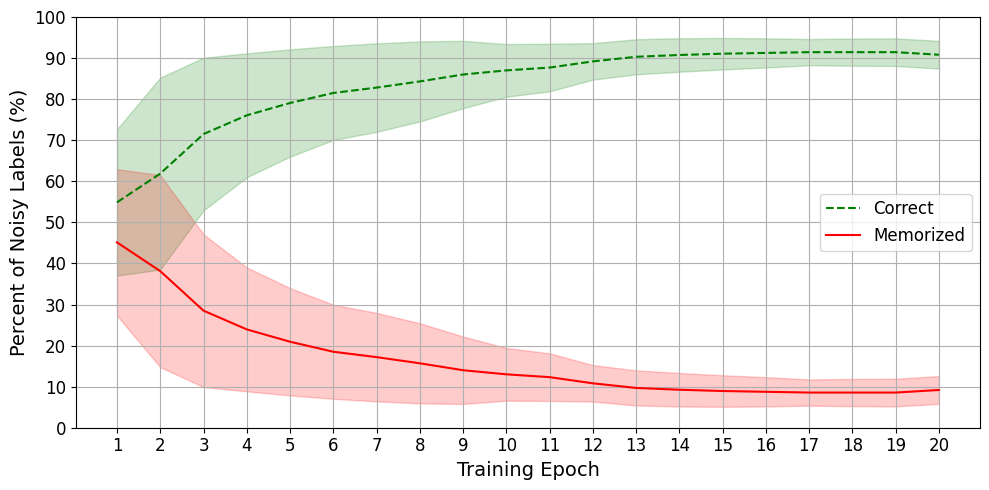

In [30]:
# Plot the fractions over training epochs
plt.figure(figsize=(10, 5))
epochs = np.arange(1, max_iter + 1)
plt.plot(epochs, mean_correct_noisy, 'g--', label='Correct')
plt.fill_between(epochs, mean_correct_noisy - std_correct_noisy, mean_correct_noisy + std_correct_noisy, color='green', alpha=0.2)
plt.plot(epochs, mean_memorized_noisy, 'r-', label='Memorized')
plt.fill_between(epochs, mean_memorized_noisy - std_memorized_noisy, mean_memorized_noisy + std_memorized_noisy, color='red', alpha=0.2)

plt.xlabel('Training Epoch', fontsize=14)
plt.ylabel('Percent of Noisy Labels (%)', fontsize=14)
plt.ylim(0, 100)
plt.xticks(epochs, fontsize=12)
plt.yticks(np.arange(0, 101, 10), fontsize=12)
plt.legend(fontsize=12)
plt.grid(True)
plt.tight_layout()
plt.savefig('thesis_early_learning.pdf')
plt.show()